### 准备Python运行环境

In [ ]:
# 如果未安装 python 环境和相关库，请先运行
# 如果已经成功安装，不需要运行
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
# 自动屏蔽不必要的报错信息
import warnings
warnings.filterwarnings("ignore")

# 导入相关库
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

### Zachary 空手道俱乐部

In [2]:
G_karate = nx.karate_club_graph()
print(nx.info(G_karate))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


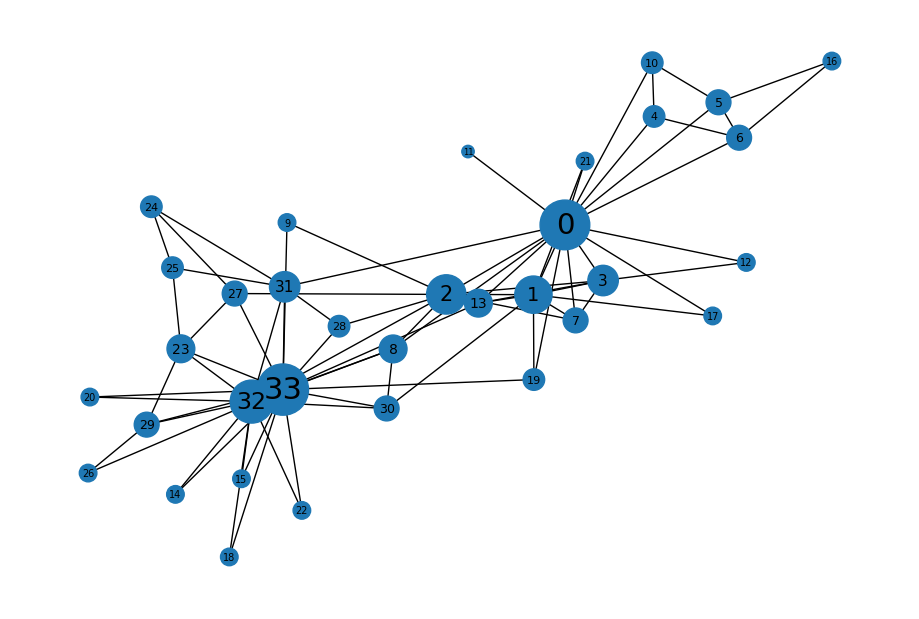

In [3]:
plt.figure(figsize=(9,6))

pos = nx.fruchterman_reingold_layout(G_karate, k=0.5, seed=1028)
d = dict(G_karate.degree)
nx.draw(G_karate, pos=pos, node_size=[v * 80 for v in d.values()], with_labels=False)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=5+d[node], ha='center', va='center')
    
plt.show()

### 布局 layout

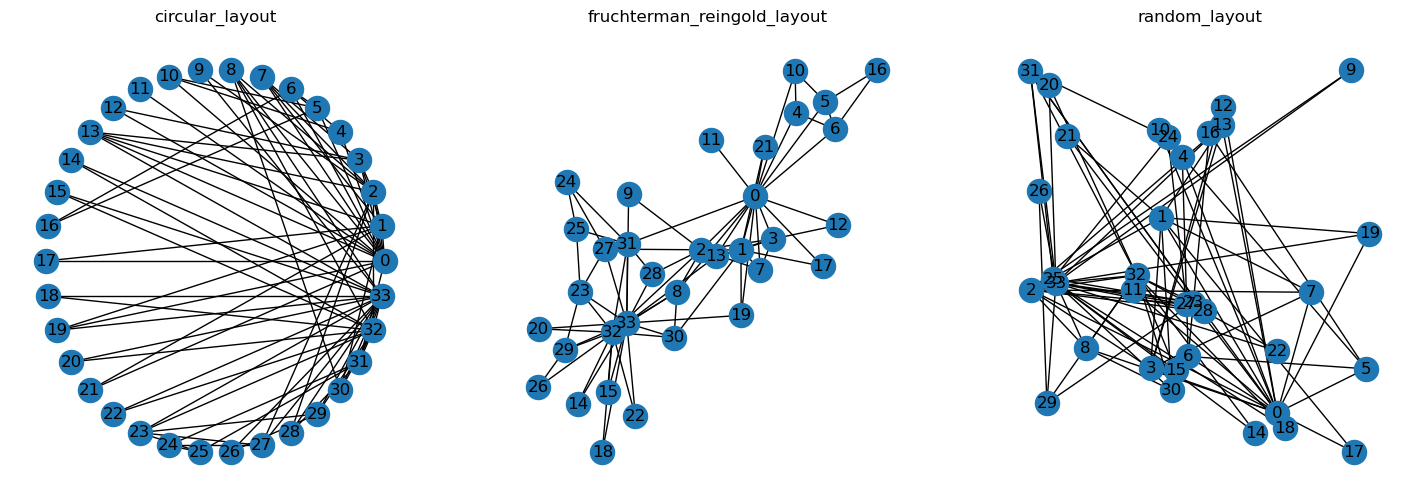

In [4]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)

pos = nx.circular_layout(G_karate)
nx.draw(G_karate, pos=pos, with_labels=True, ax=axes[0])
axes[0].set_title('circular_layout')

pos = nx.fruchterman_reingold_layout(G_karate, k=0.5, seed=1028)
nx.draw(G_karate, pos=pos, with_labels=True, ax=axes[1])
axes[1].set_title('fruchterman_reingold_layout')

pos = nx.random_layout(G_karate, seed=1028)
nx.draw(G_karate, pos=pos, with_labels=True, ax=axes[2])
axes[2].set_title('random_layout')

plt.show()

### 度和度分布

In [10]:
degree_sequence = sorted([d for n, d in G_karate.degree])
degree_counts = Counter(degree_sequence)
degree, frequence = zip(*degree_counts.items())

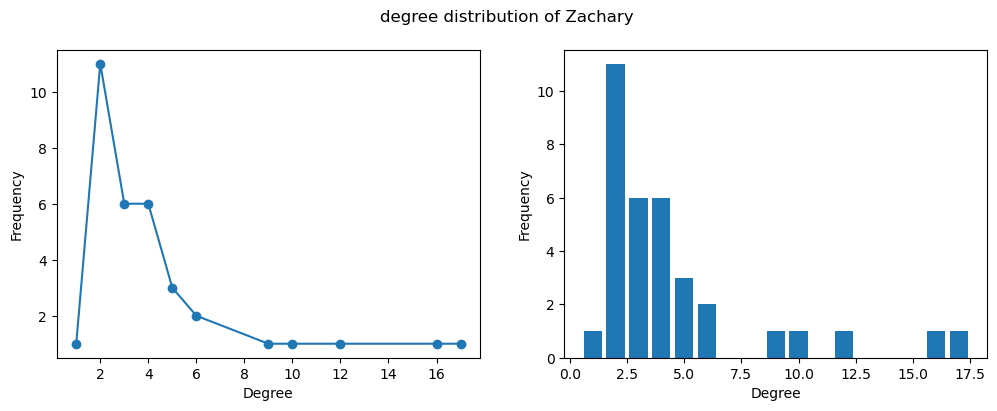

In [11]:
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

axes[0].plot(degree, frequence, 'o-')
axes[0].set(xlabel='Degree', ylabel='Frequency')

axes[1].bar(degree, frequence)
axes[1].set(xlabel='Degree', ylabel='Frequency')

plt.suptitle('degree distribution of Zachary')
plt.show()

### 集聚系数 clustering coefficient

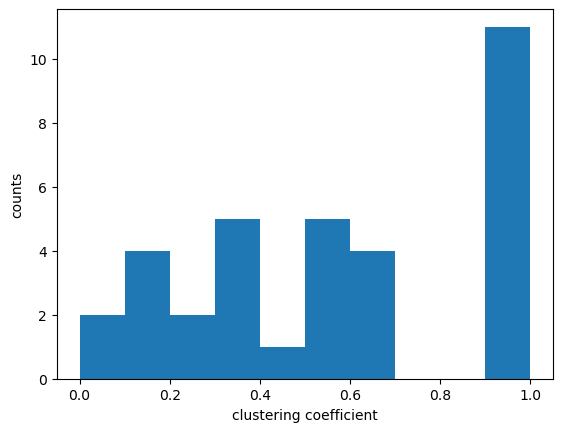

In [6]:
# 你的朋友之间互相认识的概率，比如，你朋友圈里两个好朋友的互相评论。
cc = nx.clustering(G_karate)

plt.hist(list(cc.values()))
plt.xlabel("clustering coefficient")
plt.ylabel("counts")
plt.show()

### 距离和平均距离

In [7]:
nx.average_shortest_path_length(G_karate)

2.408199643493761

In [8]:
distances = []

for n, ds in nx.shortest_path_length(G_karate):
    distances.extend(ds.values())
    
dis_counts = Counter(distances)
dis, frequence = zip(*dis_counts.items())

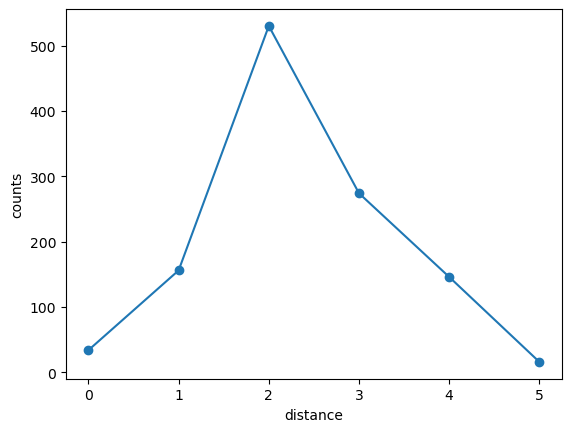

In [9]:
plt.plot(dis, frequence, 'o-')
plt.xlabel("distance")
plt.ylabel("counts")
plt.show()

### **连通性**

In [10]:
# 网络是否连通？
print(nx.is_connected(G_karate))

True


### **寻找度大节点**

In [11]:
highest_degree_node = max(G_karate.nodes, key=G_karate.degree)
print(f"node \'{highest_degree_node}\' has largest degree with {G_karate.degree(highest_degree_node)}.")

node '33' has largest degree with 17.


### **簇度相关性**

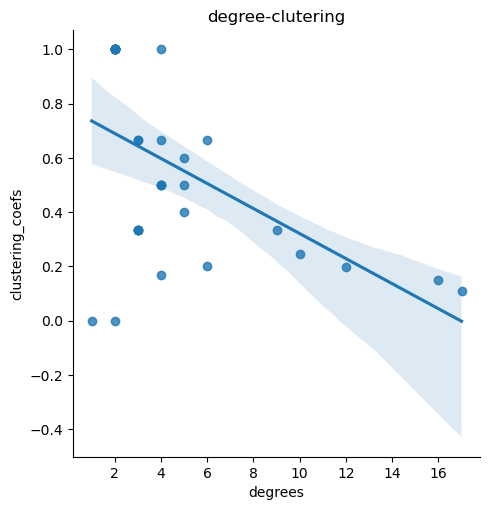

In [12]:
clustering_coefs = list(nx.clustering(G_karate).values())
degrees = [n for _, n in G_karate.degree()]

data = pd.DataFrame({'clustering_coefs': clustering_coefs, 
                     'degrees': degrees})

g = sns.lmplot(x='degrees', y='clustering_coefs', data=data)

plt.title('degree-clutering')
plt.show()

### **同配性**

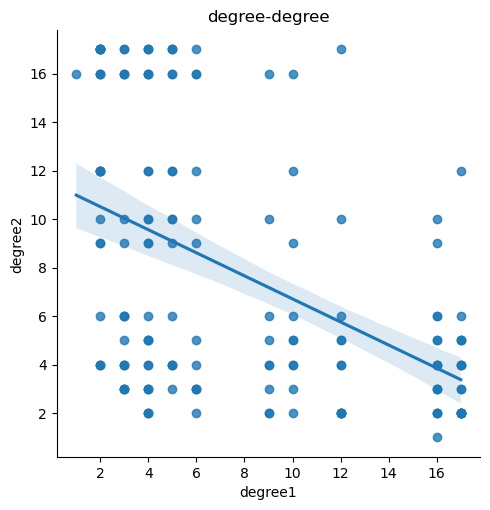

In [15]:
# 度度相关性
degree1 = []
degree2 = []

for v in G_karate:  
    for neighbor in G_karate.neighbors(v):
        degree1.append(G_karate.degree(v))
        degree2.append(G_karate.degree(neighbor))

data = pd.DataFrame({'degree1': degree1, 
                     'degree2': degree2})

g = sns.lmplot(x='degree1', y='degree2', data=data)

plt.title('degree-degree')
plt.show()

**同配性系数 Assortative**

In [14]:
nx.degree_assortativity_coefficient(G_karate)

-0.47561309768461413

**如何寻找 Hub 节点**

In [2]:
G = nx.Graph()

G.add_edge('A', 'B')
G.add_edge('A', 'D')
G.add_edge('A', 'E')
G.add_edge('A', 'F')
G.add_edge('B', 'C')
G.add_edge('B', 'F')
G.add_edge('D', 'E')
G.add_edge('F', 'G')

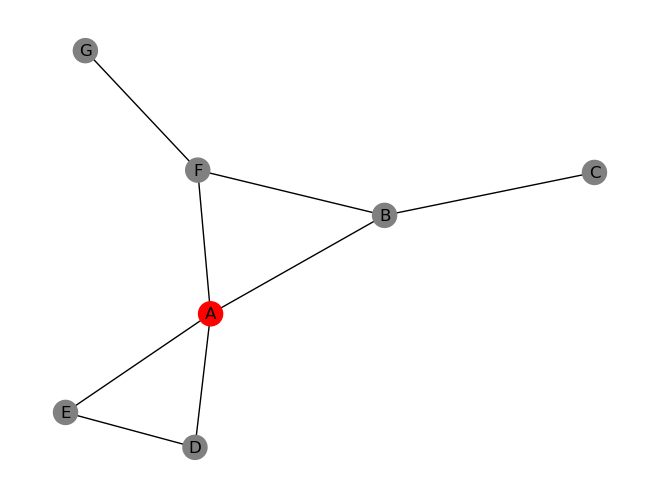

In [18]:
nx.draw(G, with_labels=True, node_color=['red' if n=='A' else 'grey' for n in G.nodes])

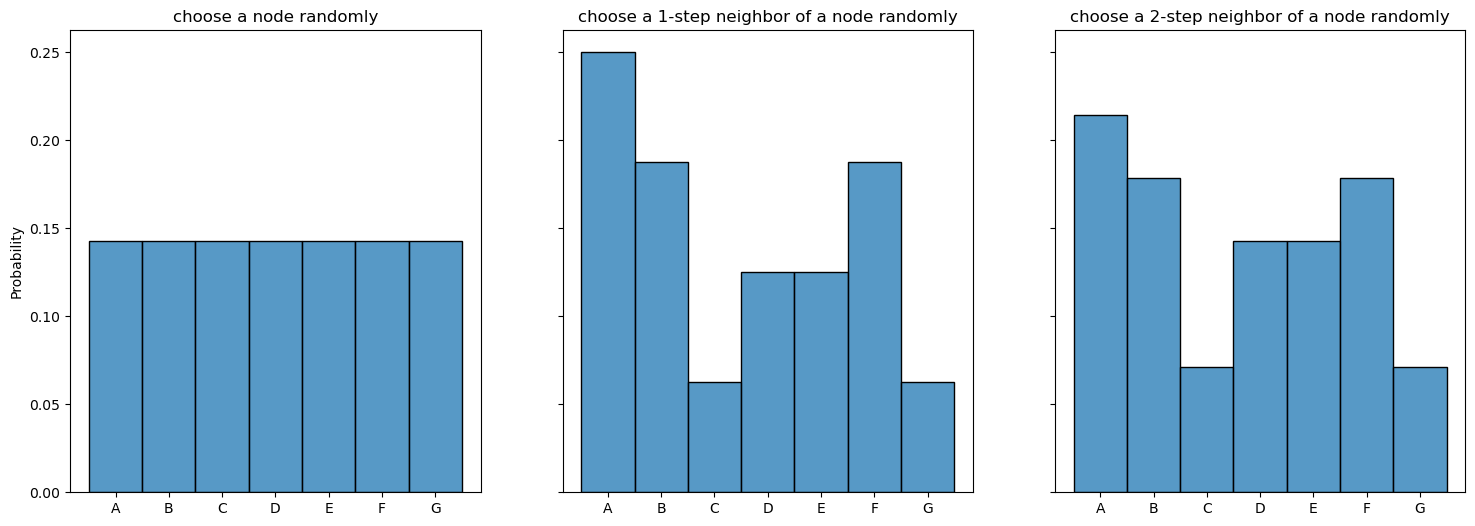

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

neighbors_0 = []
for n in G.nodes:
    neighbors_0.append(n)
sns.histplot(sorted(neighbors_0), stat='probability', ax=axes[0])
axes[0].set_title('choose a node randomly')

neighbors_1 = []
for n in G.nodes:
    neighbors_1.extend(list(G.neighbors(n)))
sns.histplot(sorted(neighbors_1), stat='probability', ax=axes[1])
axes[1].set_title('choose a 1-step neighbor of a node randomly')

neighbors_2 = []
for i in G.nodes:
    for j in G.neighbors(i):
        for k in G.neighbors(j):
            if k == i:
                continue
            neighbors_2.append(k)
sns.histplot(sorted(neighbors_2), stat='probability', ax=axes[2])
axes[2].set_title('choose a 2-step neighbor of a node randomly')

plt.show()